In [53]:
#Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import os

In [54]:
import matplotlib
matplotlib.__version__

'3.9.4'

In [55]:
import os
print(os.getcwd())

/Users/javieraquezada/Desktop/Citi-Bike-


In [56]:
#Importing Data Set

df = pd.read_csv("Data/merged_citibike_weather.csv")


In [57]:
print(df.head())

     end_lat    end_lng end_station_id  \
0  40.736982 -74.027781          HB103   
1  40.719586 -74.043117          JC005   
2  40.719586 -74.043117          JC005   
3  40.719586 -74.043117          JC005   
4  40.719586 -74.043117          JC005   

                               end_station_name             ended_at  \
0  south waterfront walkway - sinatra dr & 1 st  2022-03-18 15:45:34   
1                                 grove st path  2022-03-04 16:50:45   
2                                 grove st path  2022-03-13 17:54:44   
3                                 grove st path  2022-03-13 15:41:22   
4                                 grove st path  2022-03-11 12:33:24   

  member_casual           ride_id  rideable_type  start_lat  start_lng  \
0        casual  3255D3E3F33CDC45   classic_bike  40.743140 -74.040041   
1        member  17FA5604A37338F9  electric_bike  40.723659 -74.064194   
2        member  7DEC9ADDB8D6BBE1  electric_bike  40.723659 -74.064194   
3        member  9

In [58]:
#Consistency Checks
print(df.shape) 

(1317456, 20)


In [59]:
print(df.describe())

            end_lat       end_lng     start_lat     start_lng           PRCP  \
count  1.313844e+06  1.313844e+06  1.317456e+06  1.317456e+06  601284.000000   
mean   4.073166e+01 -7.404021e+01  4.073172e+01 -7.404045e+01       0.203670   
std    1.227479e-02  1.214432e-02  1.215730e-02  1.218024e-02       0.498942   
min    4.064000e+01 -7.414000e+01  4.070650e+01 -7.408896e+01       0.000000   
25%    4.071959e+01 -7.404595e+01  4.072112e+01 -7.404630e+01       0.000000   
50%    4.073101e+01 -7.403798e+01  4.073117e+01 -7.403798e+01       0.000000   
75%    4.074097e+01 -7.403097e+01  4.074097e+01 -7.403160e+01       0.100000   
max    4.087241e+01 -7.388827e+01  4.075499e+01 -7.402359e+01       2.950000   

                TAVG           TMAX           TMIN  
count  601284.000000  601284.000000  601284.000000  
mean       19.147844      23.813524      15.208398  
std         8.832370       9.170562       8.883835  
min        -8.000000      -5.500000     -12.100000  
25%        13.

In [60]:
# Checking for missing values
print(df.isna().sum())

end_lat                 3612
end_lng                 3612
end_station_id          5936
end_station_name        5936
ended_at                   0
member_casual              0
ride_id                    0
rideable_type              0
start_lat                  0
start_lng                  0
start_station_id          10
start_station_name        10
started_at                 0
start_station_type        10
end_station_type        5936
date                       0
PRCP                  716172
TAVG                  716172
TMAX                  716172
TMIN                  716172
dtype: int64


In [61]:
# Fixing the missing values situation from Task 2.2
# Check date column
df['started_at'] = pd.to_datetime(df['started_at'])
df['date'] = pd.to_datetime(df['date'])


In [62]:
# Filter for 2022 only
df = df[(df['date'] >= '2022-01-01') & (df['date'] <= '2022-12-31')]


In [63]:
# Check numeric columns
numeric_cols = ['PRCP','TAVG','TMAX','TMIN']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [64]:
# Check how many rows still have missing weather
missing_weather = df[df[numeric_cols].isnull().any(axis=1)]
print(f'Number of trips without weather info: {len(missing_weather)}')

Number of trips without weather info: 245616


### Filtering CitiBike Trips to Match Weather Data

The merged dataset had **245,616 trips without corresponding weather information**.  
After investigating, it became clear that:

- The CitiBike dataset spans **2021-07-01 to 2022-11-30**.
- The NOAA weather data we pulled covers **2022-01-01 to 2022-09-07**.

Thus, trips **outside the weather data range** do not have weather observations, leading to missing values.

#### Decision

To ensure consistency and accuracy, we **filtered the CitiBike trips to only include dates within the weather data range** (2022-01-01 to 2022-09-07).  

**Reasoning:**  

- Preserves only trips with valid weather information, avoiding assumptions or imputed values.
- Ensures any analysis linking trips to weather is based on actual recorded observations.
- Reduces the number of missing values, simplifying downstream analysis.

This approach is preferred when precise weather-trip correlations are required, and we want to rely on **observed data** rather than estimated or default values.

In [65]:
# Defining start and end dates of the weather data
weather_start = '2022-01-01'
weather_end = '2022-09-07'

# Filtering the merged dataframe
df_2022 = df[(df['started_at'] >= weather_start) &
                             (df['started_at'] <= weather_end)]

In [66]:
# Check how many trips remain
print("Number of trips after filtering:", len(df_2022))

Number of trips after filtering: 598215


By filtering df_merged to the dates covered by the weather dataset (2022-01-01 to 2022-09-07), It was removed all trips that had no corresponding weather info.

This reduced the missing values from 245,616 down to zero for trips outside the weather range. Now df_filtered_2022 is fully aligned with the weather data.

In [67]:
print(df_2022.shape)

(598215, 20)


In [68]:
print(df_2022.isna().sum())

end_lat               1503
end_lng               1503
end_station_id        2077
end_station_name      2077
ended_at                 0
member_casual            0
ride_id                  0
rideable_type            0
start_lat                0
start_lng                0
start_station_id         0
start_station_name       0
started_at               0
start_station_type       0
end_station_type      2077
date                     0
PRCP                     0
TAVG                     0
TMAX                     0
TMIN                     0
dtype: int64


In [69]:
#Data Cleaning and Weather Merge Summary
#1.	Original merge:
#.  CitiBike dataset had 1,317,456 trips.
#	After merging with weather data, 245,616 trips lacked weather info because their dates were outside the weather dataset range (2022-01-01 to 2022-09-07).
#2.	Filtering by weather coverage:
# We created df_filtered_2022 by keeping only trips within the weather dataset range.
# Number of trips after filtering: 598,215.
# All trips now have corresponding weather data, so PRCP, TAVG, TMAX, and TMIN columns no longer have missing values.
#3.	Other missing values:
# Minor missing entries in station-related columns (e.g., end_lat, end_lng, end_station_id/name, end_station_type) remain because some stations appear in trips but weren’t fully listed in the reference station metadata.
# These can be handled later (fill with defaults, nearest station info, or drop if appropriate).

#Why we filtered instead of filling missing weather data:
# Filling missing weather data would have required assumptions about temperature and precipitation.
# Filtering ensures that every trip in the dataset corresponds to actual observed weather, preserving data accuracy.
# This approach avoids introducing potentially misleading or artificial data.

In [78]:
# Step 3. Creating a line plot of the temperatures for 2022 using the weather data frame. Pandas plotting function.
df_temp = df_2022.set_index('date')

In [79]:
df_temp.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,start_station_type,end_station_type,PRCP,TAVG,TMAX,TMIN
date,,,,,,,,,,,,,,,,,,,
2022-03-18,40.736982,-74.027781,HB103,south waterfront walkway - sinatra dr & 1 st,2022-03-18 15:45:34,casual,3255D3E3F33CDC45,classic_bike,40.743140,-74.040041,HB404,mama johnson field - 4 st & jackson st,2022-03-18 15:38:17,both,both,0.0,13.9,22.8,9.4
2022-03-04,40.719586,-74.043117,JC005,grove st path,2022-03-04 16:50:45,member,17FA5604A37338F9,electric_bike,40.723659,-74.064194,JC020,baldwin at montgomery,2022-03-04 16:44:48,both,both,0.0,-1.9,3.3,-5.5
2022-03-13,40.719586,-74.043117,JC005,grove st path,2022-03-13 17:54:44,member,7DEC9ADDB8D6BBE1,electric_bike,40.723659,-74.064194,JC020,baldwin at montgomery,2022-03-13 17:44:32,both,both,0.0,-2.3,1.7,-4.9
2022-03-13,40.719586,-74.043117,JC005,grove st path,2022-03-13 15:41:22,member,9D69F74EEF231A2E,classic_bike,40.723659,-74.064194,JC020,baldwin at montgomery,2022-03-13 15:33:47,both,both,0.0,-2.3,1.7,-4.9
2022-03-11,40.719586,-74.043117,JC005,grove st path,2022-03-11 12:33:24,member,C84AE4A9D78A6347,classic_bike,40.723659,-74.064194,JC020,baldwin at montgomery,2022-03-11 12:21:18,both,both,0.0,7.2,11.7,2.2


In [80]:
print(df_temp.columns)

Index(['end_lat', 'end_lng', 'end_station_id', 'end_station_name', 'ended_at',
       'member_casual', 'ride_id', 'rideable_type', 'start_lat', 'start_lng',
       'start_station_id', 'start_station_name', 'started_at',
       'start_station_type', 'end_station_type', 'PRCP', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')


<Axes: title={'center': 'Daily Average Temperature'}, xlabel='date'>

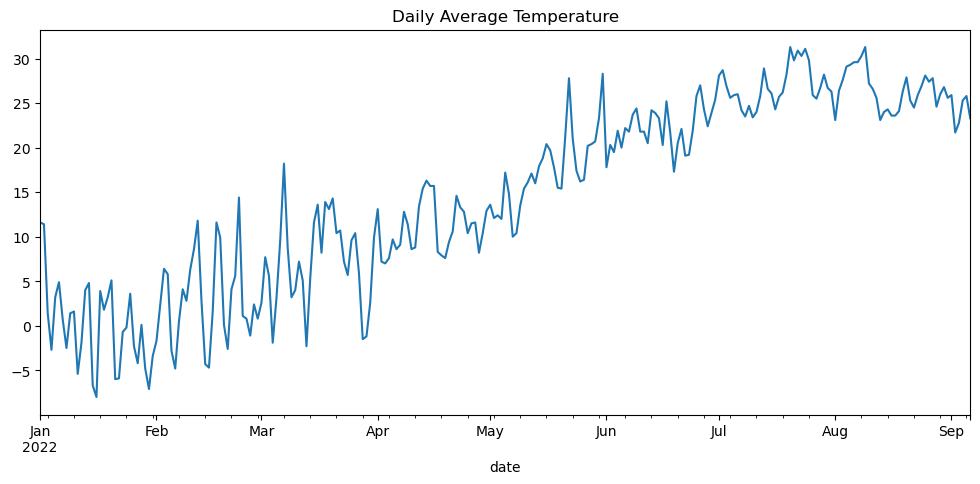

In [ ]:
# Rename TAVG to avgTemp
df_temp = df_temp.rename(columns={'TAVG': 'avgTemp'})

# Aggregate by date
daily_avg = df_temp.groupby('date')['avgTemp'].mean()

# Plotting
daily_avg.plot(figsize=(12, 5), title='Daily Average Temperature')

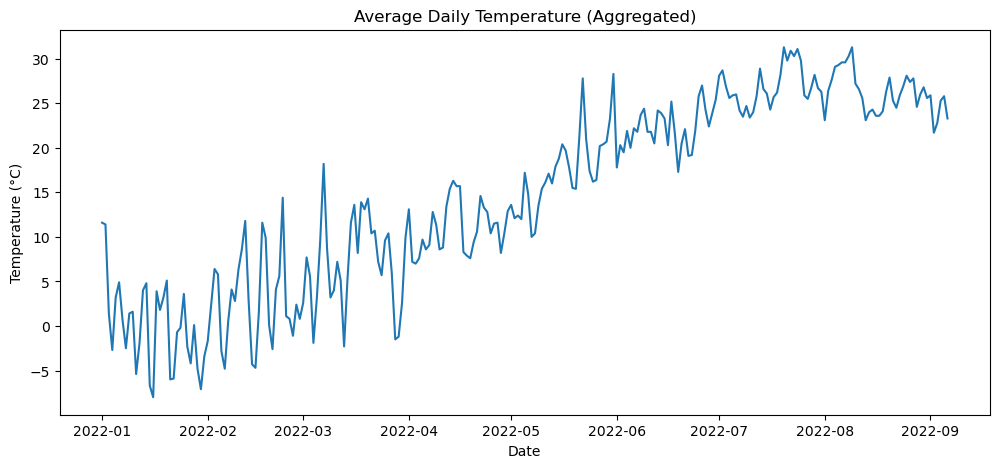

In [ ]:
# Plotting 2nd option
daily_avg.plot(figsize=(12,5), title='Average Daily Temperature (Aggregated)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()

In [ ]:
# Step 4. Creating a column with the count of trips per day and merge it with the weather dataframe
# Count trips per day using the correct column
df_group = df_2022.groupby('date').agg(trip_count=('ride_id', 'count')).reset_index()

df_group.head()

,date,trip_count
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [94]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          598215
left_only     248685
right_only         0
Name: count, dtype: int64
Shape of January 1st is (0, 22)
Shape of January 2nd is (0, 22)
Index(['end_lat', 'end_lng', 'end_station_id', 'end_station_name', 'ended_at',
       'member_casual', 'ride_id', 'rideable_type', 'start_lat', 'start_lng',
       'start_station_id', 'start_station_name', 'started_at',
       'start_station_type', 'end_station_type', 'PRCP', 'TAVG', 'TMAX',
       'TMIN', 'trip_count', '_merge'],
      dtype='object')


In [95]:
# Merge with weather data
df_merged = pd.merge(df_temp, df_group, on='date', how='left')

In [96]:
# Cheking
df_merged.head()

,date,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,...,started_at,start_station_type,end_station_type,PRCP,TAVG,TMAX,TMIN,trip_count_x,_merge,trip_count_y
0,2022-01-01,40.712774,-74.036486,JC038,essex light rail,2022-01-01 09:35:46,member,115C78C3039FFA89,electric_bike,40.712774,...,2022-01-01 09:21:14,both,both,1.93,11.6,13.9,10.0,592.0,both,592.0
1,2022-01-01,40.750604,-74.024020,HB201,12 st & sinatra dr n,2022-01-01 02:43:57,member,7FFD810CAA7A919E,classic_bike,40.750604,...,2022-01-01 02:43:56,both,both,1.93,11.6,13.9,10.0,592.0,both,592.0
2,2022-01-01,40.724294,-74.035483,JC098,washington st,2022-01-01 02:18:42,member,E715E8432031B72C,classic_bike,40.712774,...,2022-01-01 02:13:33,both,both,1.93,11.6,13.9,10.0,592.0,both,592.0
3,2022-01-01,40.746647,-73.993915,6247.06,w 27 st & 7 ave,2022-01-01 18:55:25,casual,BF1B7B1E1961A87B,electric_bike,40.715178,...,2022-01-01 17:18:46,both,end_only,1.93,11.6,13.9,10.0,592.0,both,592.0
4,2022-01-01,40.735938,-74.030305,HB101,hoboken terminal - hudson st & hudson pl,2022-01-01 11:29:27,member,4A01F0E53C6F4386,electric_bike,40.734786,...,2022-01-01 11:23:32,both,both,1.93,11.6,13.9,10.0,592.0,both,592.0


In [109]:
print(df_merged.columns)

Index(['date', 'end_lat', 'end_lng', 'end_station_id', 'end_station_name',
       'ended_at', 'member_casual', 'ride_id', 'rideable_type', 'start_lat',
       'start_lng', 'start_station_id', 'start_station_name', 'started_at',
       'start_station_type', 'end_station_type', 'PRCP', 'TAVG', 'TMAX',
       'TMIN', 'trip_count_x', '_merge', 'trip_count_y'],
      dtype='object')


In [ ]:
# Rename the correct column due to duplicated column during merging
df_merged = df_merged.rename(columns={'trip_count_y': 'trip_count'})

# dropping extra column
df_merged = df_merged.drop(columns=['trip_count_x', '_merge'])

In [ ]:
#Step 5. Creating a line chart of bike trip counts and temperatures plotted on dual axis.
# Averages
df_merged['trip_count_smooth'] = df_merged['trip_count'].rolling(window=7, min_periods=1).mean()
df_merged['avgTemp_smooth'] = df_merged['TAVG'].rolling(window=7, min_periods=1).mean()

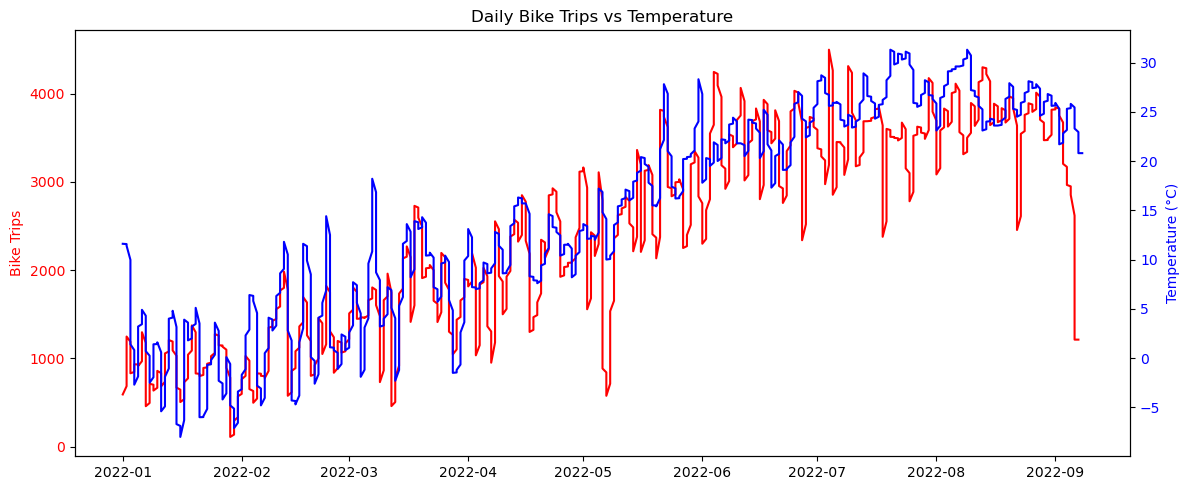

In [ ]:
#Plotting
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5))

# Bike trips
ax.plot(df_merged['date'], df_merged['trip_count_smooth'], color='red', label='Daily Bike Trips')
ax.set_ylabel('Bike Trips', color='red')
ax.tick_params(axis='y', labelcolor='red')

# Temperature
ax2 = ax.twinx()
ax2.plot(df_merged['date'], df_merged['avgTemp_smooth'], color='blue', label='Avg Temperature')
ax2.set_ylabel('Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Daily Bike Trips vs Temperature")
fig.tight_layout()
plt.show()

In [113]:
# Step 6. Use of matplotlib and paradigm used : 
#To visualize the relationship between daily bike trips and temperature, we used Matplotlib with a dual-axis line chart.
#Steps and methodology:
#	1.	Data Preparation
#We aggregated bike trips per day into a trip_count column and deleted posterior accidentally duplicate column created.
#We merged the daily bike counts with weather data, which included average daily temperature (TAVG).
#Rolling averages (7-day window) were applied to smooth the series and reduce the “chunky” look because of previous messy attempts.
#	2.	Creating the Plot
#We used the object-oriented (OO) paradigm of Matplotlib:
#	Created a figure and axis object 
#	Plotted bike trips on the primary y-axis 
#	Created a secondary y-axis  and plotted the temperature series there.
#	Labels, colors were customized for clarity.
#	3.	Advantages of OO Paradigm
#	Provides more control over multiple axes and layout.
#	Enables layering of different datasets like bike trips and temperature, on the same figure.
#	Avoids limitations of the procedural "plt.plot" approach when combining multiple y-axes or subplots.

# as a result we get a clear dual-axis line chart that shows trends in daily bike trips alongside temperature, allowing easy visual comparison.

In [114]:
# Export as CSV
df_2022.to_csv("df_2022.csv", index=False)

# And as a compressed CSV (gzip) to save space
df_2022.to_csv("df_2022.csv.gz", index=False, compression="gzip")